In [1]:
! pwd

/Users/alex/Documents/bagel-benchmark/machine_learning


In [118]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas 

Collect the feature set and the experimental data 

In [119]:
f = pandas.read_csv( '../rosetta_runs/benchmark/benchmark_feature_set.csv' )
f = f.groupby( 'description' ).apply( lambda x: x.sort_values( 'total_score' ).head( 10 ).mean() )
my_features = list( f.columns )

In [120]:
dat = pandas.read_csv( '../data_sets/experimental/thermo_paper_data_set.csv', index_col=0 )
dat = dat.join( f ) 

In [121]:
df = dat[ my_features + [ 'tm' ] ].dropna()
print df.shape

(67, 60)


Scale the features. Experimental data will be scaled relative to the Tm of the native sequence using the formula `log2( mutant_tm / native_tm )`. Features will be scaled using `sklearn.preprocessing.StandardScaler` to have mean 0 and variance of 1. 

In [122]:
from sklearn.preprocessing import StandardScaler
import numpy as np 

scl = StandardScaler()
X = scl.fit_transform( df.ix[ : , :-1 ] )

y = df.ix[ : , -1 ].map( lambda x: np.log2( x / 39.96 ) ).as_matrix().ravel()

(67, 2)


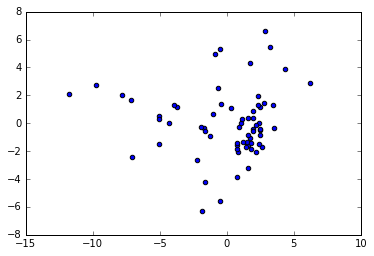

In [123]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

pca = PCA( n_components=2 )
my_res = pca.fit_transform( X, y ) 
print my_res.shape

plt.scatter( [ x[0] for x in my_res ], [ x[1] for x in my_res ] )

(67, 2)


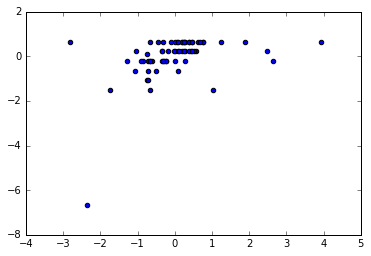

In [124]:
from sklearn.feature_selection import SelectKBest

best = SelectKBest( k=2 )
my_res = best.fit_transform( X, y ) 
print my_res.shape

plt.scatter( [ x[0] for x in my_res ], [ x[1] for x in my_res ] )

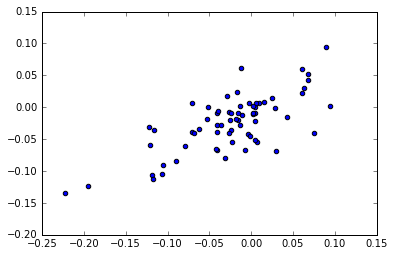

In [130]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
pred = clf.fit( X, y ).predict( X )

plt.scatter( y, pred )

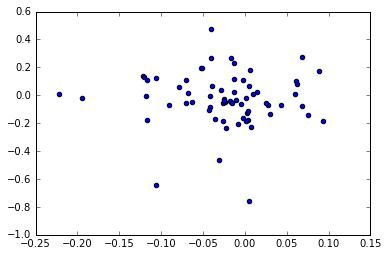

In [132]:
from sklearn.cross_validation import cross_val_predict
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
pred = cross_val_predict( clf, X, y, cv=10 )

plt.scatter( y, pred )

In [125]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import ElasticNetCV

my_results = []
for i in range( 10 ):
    clf = ElasticNetCV()
    my_results.append( clf.fit( X, y ).predict( X ) ) 
    
my_results = pandas.DataFrame( my_results ) 
#my_results = my_results.describe().loc[ [ 'mean', 'std' ] ].T

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positve elastic net...


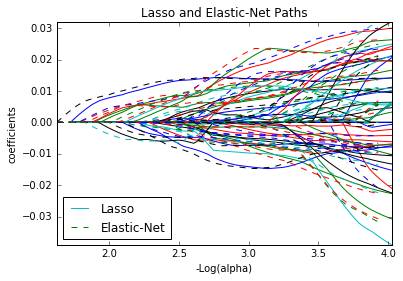

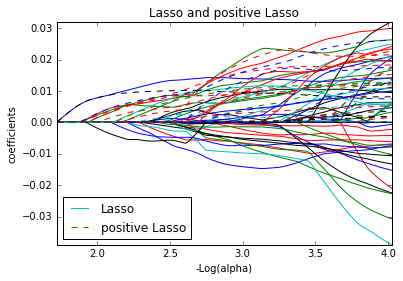

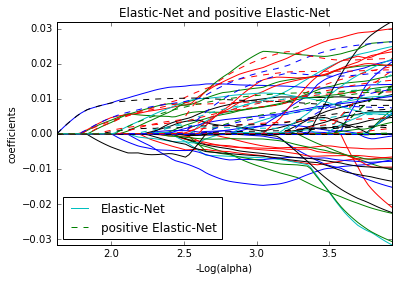

In [126]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

#diabetes = datasets.load_diabetes()
#X = diabetes.data
#y = diabetes.target

#X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positve elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_positive_lasso), coefs_positive_lasso.T,
              linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_enet), coefs_enet.T)
l2 = plt.plot(-np.log10(alphas_positive_enet), coefs_positive_enet.T,
              linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()